<a href="https://colab.research.google.com/github/SubhikshaSukumar/ML-Projects/blob/V2/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#fghjkl

IMPORTING THE DEPENDENCIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer #convrt text - feature vectors
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [ ]:
pip install pyreadstat

DATA ACQUISITION

In [ ]:
hfp = pd.read_csv('/content/heart_failure_clinical_records_dataset (1).csv')

In [ ]:
hfp.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
hfp.shape

(299, 13)

In [ ]:
hfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
hfp.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
#FINGDING THE OUTLIERS

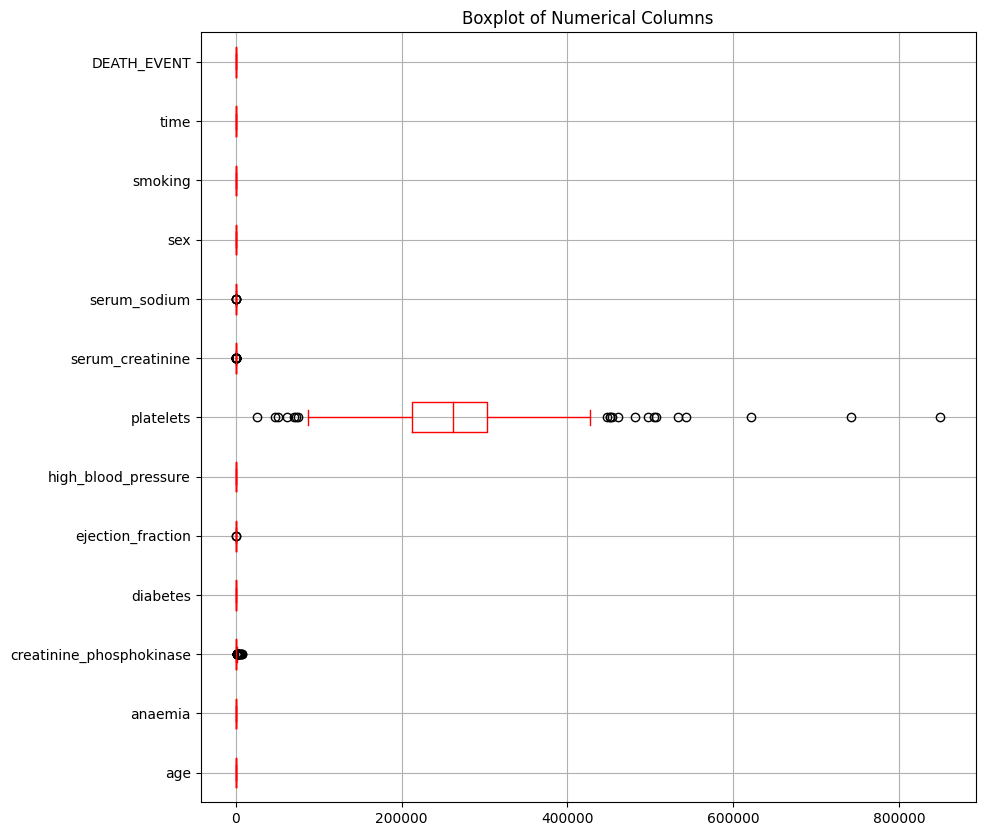

In [ ]:
num_cols = hfp.select_dtypes(include=['int64', 'float64'])

# Create a boxplot for all the numerical columns
fig, ax = plt.subplots(figsize=(10, 10))
num_cols.boxplot(ax=ax, vert=False, color='red') # vert=False states that the boxplot has to be in an horizontal view.
plt.title('Boxplot of Numerical Columns')
plt.show()

In [ ]:
#FINDING THE OUTLIERS USING IQR METHOD

In [ ]:
q1 = hfp['platelets'].quantile(0.25) # calculate the 25th percentile
q2 = hfp['platelets'].quantile(0.75) # calculate the 75th percentile
iqr = q2 - q1 # calculate the interquartile range

print('q1 =',q1)
print('q2 =',q2)
print('iqr =',iqr)

lower_bound = q1 - 1.5 * iqr
upper_bound = q2 + 1.5 * iqr

print('lower_bound =',lower_bound)
print('upper_bound =',upper_bound)

q1 = 212500.0
q2 = 303500.0
iqr = 91000.0
lower_bound = 76000.0
upper_bound = 440000.0


In [ ]:
#HANDLING THE OUTLIERS

In [ ]:
hfp['platelets'] = np.where(hfp['platelets'] < lower_bound, lower_bound, hfp['platelets']) #Replacing the values lesser values with lower bound

In [ ]:
hfp['platelets'] = np.where(hfp['platelets'] > upper_bound, upper_bound, hfp['platelets']) #Replacing the values greater values with upper bound

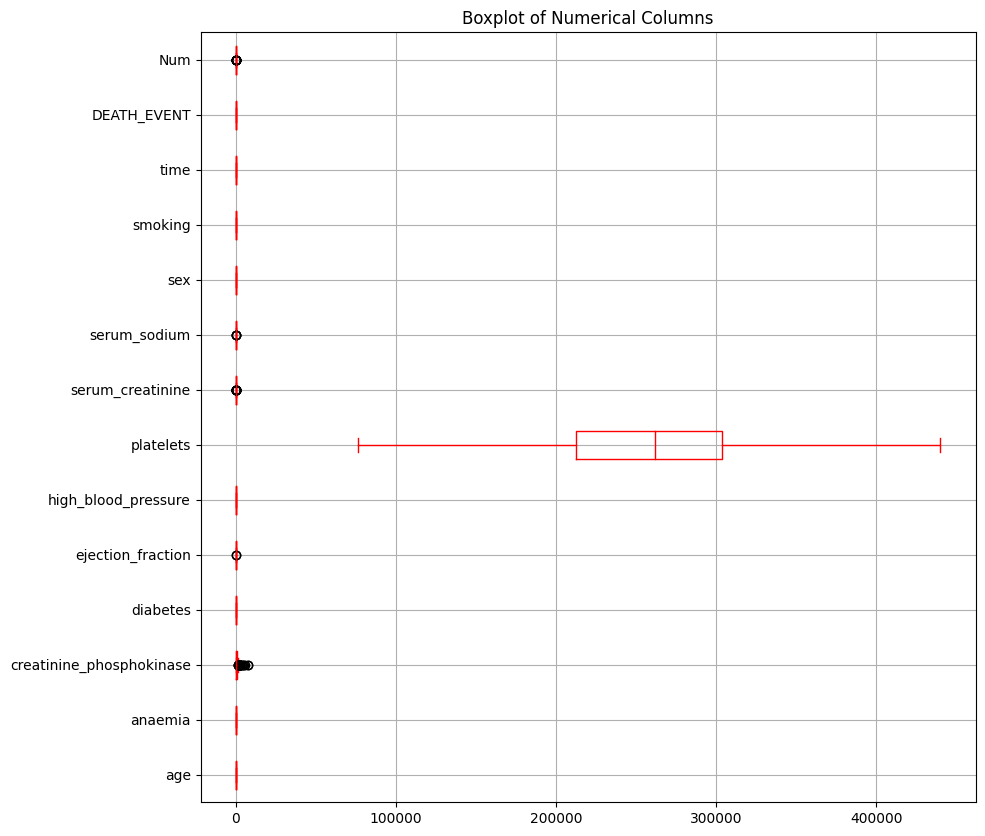

In [ ]:
num_cols = hfp.select_dtypes(include=['int64', 'float64'])

# Create a boxplot for all the numerical columns
fig, ax = plt.subplots(figsize=(10, 10))
num_cols.boxplot(ax=ax, vert=False, color='red') # vert=False states that the boxplot has to be in an horizontal view.
plt.title('Boxplot of Numerical Columns')
plt.show()

In [ ]:
# NOW THE OUTLIERS HAVE BEEN REDUCED OR SIMPLY HANDLED

FEATURE ENGINEERING

In [ ]:
# Assuming 'hfp' is your DataFrame and 'DEATH_EVENT' is your target variable
X = hfp.drop('DEATH_EVENT', axis=1)  # Create feature matrix X
Y = hfp['DEATH_EVENT']              # Create target variable Y

In [ ]:
print(X)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64


SPLITTING THE DATASET INTO TRAIN AND TEST DATASETS

In [ ]:
# Now you can use train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

SELECTING THE BEST MODEL

In [ ]:
# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize the models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
import numpy as np # Import numpy for np.mean()

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', C=1, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}

# Evaluate each model using cross-validation on the training set
results = {}
for name, model in models.items():
    # Use X_train_scaled for cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, Y_train, cv=5, scoring='accuracy')
    results[name] = np.mean(cv_scores)
    print(f"{name}: {np.mean(cv_scores):.4f}")

# Find the best model
best_model = max(results, key=results.get)
print(f"Best model: {best_model} with accuracy of {results[best_model]:.4f}")

Random Forest: 0.8788
Gradient Boosting: 0.8327
Support Vector Machine: 0.8242
Logistic Regression: 0.8322
Neural Network: 0.8117
Best model: Random Forest with accuracy of 0.8788


PREDICTION

In [ ]:
# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train_scaled, Y_train)

# Make predictions
y_pred = rf_clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')

# Compute precision, recall, and F1 score
precision = precision_score(Y_test, y_pred, average='macro')
recall = recall_score(Y_test, y_pred, average='macro')
f1 = f1_score(Y_test, y_pred, average='macro')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.75
Precision: 0.7872670807453416
Recall: 0.7114285714285714
F1 Score: 0.715099715099715


In [ ]:
# Initialize the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb_clf.fit(X_train_scaled, Y_train)

# Make predictions
y_pred = gb_clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')

# Compute precision, recall, and F1 score
precision = precision_score(Y_test, y_pred, average='macro')
recall = recall_score(Y_test, y_pred, average='macro')
f1 = f1_score(Y_test, y_pred, average='macro')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.75
Precision: 0.7579365079365079
Recall: 0.7228571428571429
F1 Score: 0.7281787979462397
